# 📊 Project 7: A Machine Learning Journey
**Author:** Sabriya Sowers
🔗 [GitHub Repository](https://github.com/ssowers2/datafun-07-applied)

### Required Python Libraries Imports

In [133]:
# Required imports for project
import sys
import os
import IPython
import numpy as np
import pandas as pd
import pyarrow as pa
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pkg_resources
import sklearn
from importlib.metadata import version
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

# Confirm imports loaded 
print("Imports loaded successfully!")

# Adds a blank line
print()  

# Check and print the versions of installed packages
print("Python Version:", sys.version)  # Python interpreter version
print("OS Version:", os.name)  # Operating system name
print("IPython Version:", IPython.__version__)  # Interactive Python shell version

# Core scientific and data processing libraries
print("NumPy Version:", np.__version__)  # Numerical computing library
print("Pandas Version:", pd.__version__)  # Data analysis and manipulation
print("PyArrow Version:", pa.__version__)  # Apache Arrow for efficient data handling
print("SciPy Version:", scipy.__version__)  # Scientific computing library

# Data visualization libraries
print("Matplotlib Version:", plt.matplotlib.__version__)  # Plotting library
print("Seaborn Version:", sns.__version__)  # Statistical data visualization

# Natural Language Processing (NLP) libraries
print("NLTK Version:", nltk.__version__)  # Natural language processing toolkit
print("TextBlob Version:", version("textblob")) # Text processing and sentiment analysis

# Machine Learning library
print("Scikit-learn Version:", sklearn.__version__)  # Machine learning tools

Imports loaded successfully!

Python Version: 3.13.1 (tags/v3.13.1:0671451, Dec  3 2024, 19:06:28) [MSC v.1942 64 bit (AMD64)]
OS Version: nt
IPython Version: 8.32.0
NumPy Version: 2.2.3
Pandas Version: 2.2.3
PyArrow Version: 19.0.0
SciPy Version: 1.15.2
Matplotlib Version: 3.10.0
Seaborn Version: 0.13.2
NLTK Version: 3.9.1
TextBlob Version: 0.19.0
Scikit-learn Version: 1.6.1


## Part 1: Chart a Straight Line

### Fahrenheit to Celsius Conversion

In [134]:
# Define the lambda function for Fahrenheit to Celsius conversion
c = lambda f: 5 / 9 * (f - 32)

# Create a list of tuples (Fahrenheit, Celsius)
temps = [(f, c(f)) for f in range (0, 101, 10)]

print(temps)

[(0, -17.77777777777778), (10, -12.222222222222223), (20, -6.666666666666667), (30, -1.1111111111111112), (40, 4.444444444444445), (50, 10.0), (60, 15.555555555555557), (70, 21.11111111111111), (80, 26.666666666666668), (90, 32.22222222222222), (100, 37.77777777777778)]


### Plotting Fahrenheit vs. Celsius

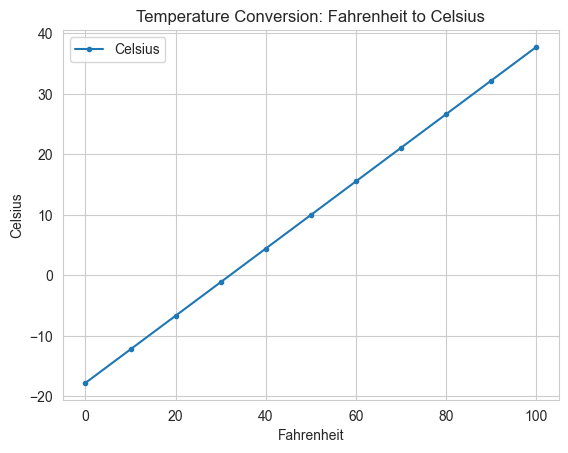

In [135]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

# Graph Title ";" removes text above chart
axes.set_title("Temperature Conversion: Fahrenheit to Celsius");  

## Part 2: Predict Avg High Temp in NYC in January

### Data Aquisition

In [136]:
# Loads dataset
nyc_df = pd.read_csv('data/ave_hi_nyc_jan_1895-2018.csv')


### Data Inspection

In [137]:
# Display the first 3 rows of the dataset to check the structure and column names
display(nyc_df.head(3))  

# Display the last 3 rows to verify data consistency and completeness
display(nyc_df.tail(3))

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


,Date,Value,Anomaly
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Data Cleaning

In [138]:
# Renaming columns for better readability
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

# Check the data type of the 'Date' column to ensure it's numeric
nyc_df.Date.dtype

#Convert YYYYMM to YYYY (truncate last two digits)
nyc_df.Date = nyc_df.Date.floordiv(100)

#
display(nyc_df.head(3))

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Descriptive Statistics

In [139]:
#Calculating basic descriptive stats for the dataset
pd.set_option('display.precision', 2)

# Display temperature stats
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Build the Model

In [140]:
# forecasting future January average high temperatures
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)

display(linear_regression.slope)

display(linear_regression.intercept)

# Predict the average high temp for 2024
forecast_2024 = linear_regression.slope * 2024 + linear_regression.intercept

np.float64(0.014771361132966163)

np.float64(8.694993233674289)

### Visualizations
- This section generates a scatter plot of historical NYC January high temperatures along with a regression line.  
- The trend line is manually extended beyond 2018 to forecast future temperatures up to 2040.  
- A red dot highlights the predicted temperature for 2024.  
- Seaborn's `regplot()` is used for initial visualization, while Matplotlib is used to extend the trend line and emphasize predictions.
- Adjusted the X-axis, Y-axis, title, and legend for clarity.


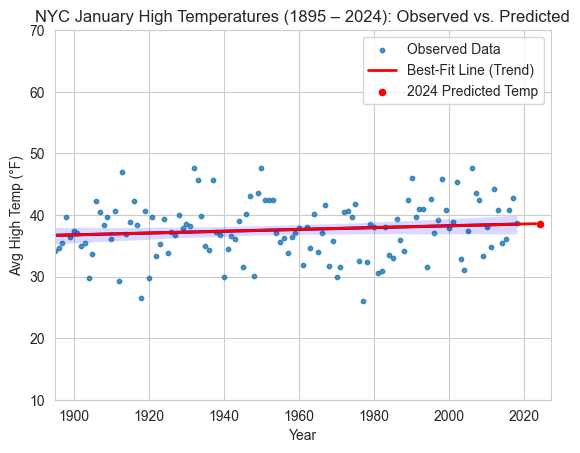

In [141]:
# Generate an extended range of years. Extends past 2024 for clarity
extended_years = np.arange(nyc_df.Date.min(), 2024)  

# Predicted line
predicted_temps = linear_regression.slope * extended_years + linear_regression.intercept  

# Set Seaborn style
sns.set_style('whitegrid')

# Create the regression plot for observed temperature data
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature, scatter_kws={"s": 10}, line_kws={"color": "blue"}, label="Observed Data")

# Plot the regression line manually so it extends to 2024
plt.plot(extended_years, predicted_temps, color='red', linestyle='-', linewidth=2, label="Best-Fit Line (Trend)")

# Plot the predicted temperature for 2024 as a red dot so it stands out
plt.scatter(2024, forecast_2024, color='red', marker='o', s=20, label='2024 Predicted Temp')

# # Set X and Y limits
plt.xlim(nyc_df.Date.min(), 2027)  # Extended slightly beyond 2024 to set the prediction clearly
plt.ylim(10, 70)

# Add Title & Labels
plt.title('NYC January High Temperatures (1895 – 2024): Observed vs. Predicted')  
plt.xlabel("Year")
plt.ylabel("Avg High Temp (°F)")

# Show legend
plt.legend();

# Prints prediction for 2024
# print(f"Predicted Average High Temperature for January 2024: {forecast_2024:.2f}°F")

## Part 3 - Predict Avg High Temp in NYC in January

## Training the Model

In [142]:
X_train, X_test, y_train, y_test = train_test_split (
    nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values, random_state=11
)

# Shows the number of rows and columns in X_train (training data for features).
display(X_train.shape)

# Shows the number of rows and columns in (test data for features).
display(X_test.shape)

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

# To print the book's output because with the above alone it didn't print. Per AI this difference happens because scikit-learn updated how it displays model parameters in version 1.0+.
print(linear_regression.get_params()) 

# To print the slope in the "m" part of the equation y = mx + b
display(linear_regression.coef_)

# To print the intercept in the "b" part of the equation y = mx + b
display(linear_regression.intercept_)

(93, 1)

(31, 1)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


array([0.01939167])

np.float64(-0.30779820252656975)

## Testing the Model

In [143]:
# This code compares the model’s predictions to the actual values for temperature.

# Uses the trained model (linear_regression) to predict temperatures based on X_test (the test set of years). Stores the predictions in predicted variable.
predicted = linear_regression.predict(X_test)

# Stores the true actual temperatures from y_test in expected variable for comparison.
expected = y_test

#  Loops every 5th element ([::5]) from predicted (aka p) and expected (aka e) to avoid printing every single value.The .2f rounds numbers to 2 decimal places. 
for p, e in zip(predicted[::5], expected[::5]):  
    print(f'Predicted: {p:.2f}, Expected: {e:.2f}')

Predicted: 37.86, Expected: 31.70
Predicted: 38.69, Expected: 34.80
Predicted: 37.00, Expected: 39.40
Predicted: 37.25, Expected: 45.70
Predicted: 38.05, Expected: 32.30
Predicted: 37.64, Expected: 33.80
Predicted: 36.94, Expected: 39.70


## Prediction

In [144]:
#  This code predicts January high temperatures for any given year using y = mx + b for 2024 and 1890.

predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

display(predict(2024).round(2))
display(predict(1890).round(2))

array([38.94])

array([36.34])

# Visualizations


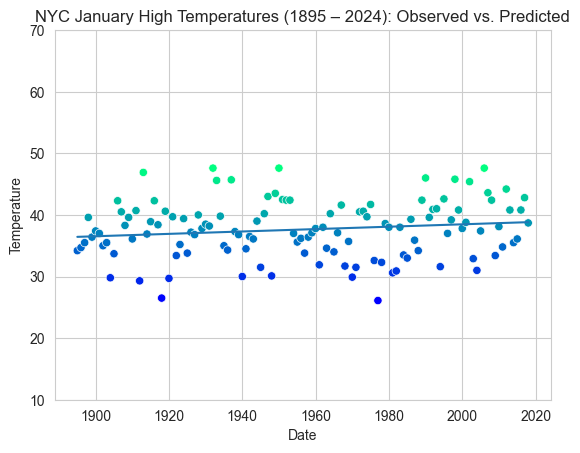

In [145]:
# Use scatterplot with the nyc DataFrame to display the data points. 
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)

# Scale y-axis range of values for better readability
axes.set_ylim(10, 70)

axes.set_title("NYC January High Temperatures (1895 – 2024): Observed vs. Predicted")

# The x-coordinates of the regression line's start and end points
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)

line = plt.plot(x, y)